# Unit 5 - Financial Planning


In [8]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()



True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()

# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()

print(json.dumps(response_data_eth, indent=4))

# Compute current value of my crpto
my_btc_value = response_data_btc['data']['1']['quotes']['USD']['price']*my_btc
my_eth_value = response_data_eth['data']['1027']['quotes']['USD']['price']*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115906552,
            "total_supply": 115906552,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3280.71,
                    "volume_24h": 73323171318,
                    "market_cap": 382086384345,
                    "percentage_change_1h": -0.347808906636427,
                    "percentage_change_24h": -13.9558441215718,
                    "percentage_change_7d": -16.5798196507623,
                    "percent_change_1h": -0.347808906636427,
                    "percent_change_24h": -13.9558441215718,
                    "percent_change_7d": -16.5798196507623
                },
                "CAD": {
                    "price": 3978.188946,
                    "volume_24h": 88911677540.2068,
             

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Create the Alpaca API object
# YOUR CODE HERE!

In [14]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69029028

In [15]:

    
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]


#df_ticker.index = df_ticker.index.date
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [17]:
# Compute the current value of shares

my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

d = {'amount': [crypto, shares]}
df_savings = pd.DataFrame(data=d)
df_savings.index = ['crypto', 'shares']
#df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,69180.963
shares,43682.500


<AxesSubplot:title={'center':'Savings composition'}, ylabel='amount'>

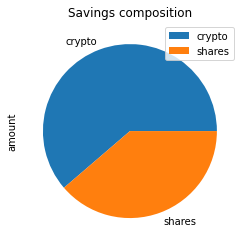

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Savings composition")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings < emergency_fund:
          print(f"You need more money in your emergency fund")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker_2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df



# Display sample data
df_ticker_2.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [39]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_data = MCSimulation(portfolio_data = df_ticker_2, weights = [0.5,0.5], num_simulation = 1000, num_trading_days = 252*30)

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999200,1.002302,1.001708,1.000367,0.994594,0.997482,0.996535,0.998088,1.005762,1.002273,...,1.006643,1.002003,1.005968,0.994469,0.995863,1.001397,0.997510,1.000864,1.008070,0.996642
2,0.991708,1.005296,1.002136,0.989397,0.996552,1.001469,1.011636,0.994020,1.012007,1.005471,...,1.006223,0.992452,1.002915,1.001527,0.994196,0.993725,1.008419,1.002979,1.014589,0.991980
3,0.986479,1.004109,0.998571,0.992454,0.996757,0.997052,1.011689,0.994542,1.020449,1.007129,...,1.010472,0.996390,0.998459,0.991129,0.984315,0.999382,1.009983,1.016754,1.016765,0.994360
4,0.989336,1.007702,0.994083,0.998742,0.987772,1.005055,1.014352,0.994478,1.015007,1.006157,...,1.016316,0.994011,0.994472,1.000031,0.981403,1.004696,1.009104,1.012623,1.013538,1.006919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.362854,8.908734,11.256606,7.639774,2.518875,5.844370,12.118404,8.636867,2.743485,5.158374,...,8.489553,6.523840,6.064912,12.687238,6.186590,16.601757,6.652788,6.305100,5.656473,12.714147
7557,6.309682,8.824951,11.219853,7.603023,2.522898,5.872235,12.041635,8.668828,2.757618,5.197500,...,8.482212,6.522500,6.038165,12.755196,6.216617,16.763157,6.682179,6.276908,5.641522,12.677973
7558,6.336622,8.771566,11.218077,7.596605,2.520943,5.856661,12.078812,8.603461,2.753584,5.259773,...,8.490741,6.464238,6.039431,12.802040,6.223939,16.814453,6.677260,6.210359,5.568042,12.623882
7559,6.266374,8.728511,11.065673,7.548307,2.518810,5.799802,11.960253,8.716982,2.727528,5.249673,...,8.502451,6.470880,5.956706,12.747483,6.223197,16.804229,6.697531,6.191553,5.509692,12.606638


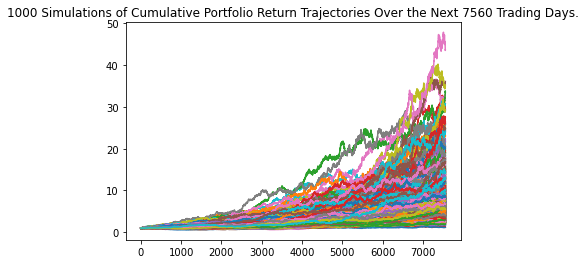

In [41]:
# Plot simulation outcomes
line_plot = retirement_data.plot_simulation()

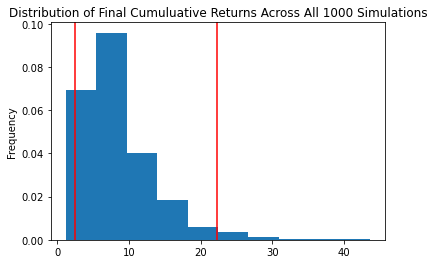

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = retirement_data.plot_distribution()


### Retirement Analysis

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = retirement_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               8.460744
std                5.206841
min                1.171474
25%                4.987635
50%                7.176809
75%               10.360558
max               43.640419
95% CI Lower       2.413800
95% CI Upper      22.287970
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [45]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48275.99 and $445759.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72413.99 and $668639.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
retirement_data_2 = MCSimulation(portfolio_data = df_ticker_2, weights = [0.5,0.5], num_simulation = 1000, num_trading_days = 252*5)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
retirement_data_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999806,0.996780,1.012406,0.996852,1.002363,0.983017,0.994451,0.999883,1.003744,1.004805,...,0.991549,1.002157,0.985371,1.000361,0.996016,1.000832,0.995301,1.001426,1.002967,1.002317
2,0.998096,0.998334,1.017062,1.004660,1.003457,0.981443,0.987862,0.993004,1.003392,1.004419,...,0.997211,0.999502,0.973774,0.999090,0.988476,0.993408,0.982292,1.002118,0.994045,0.994397
3,0.992877,1.002115,1.023830,1.008514,1.009282,0.981826,0.983402,0.991555,1.016254,1.005039,...,1.005376,1.000748,0.967963,1.003557,0.995064,0.999600,0.975896,1.002208,0.995344,0.998459
4,0.988333,1.003970,1.030931,1.021080,1.004149,0.976025,0.986499,1.001977,1.012447,1.011950,...,0.997559,1.006806,0.963506,1.007390,0.995643,0.987712,0.978885,0.999174,0.999279,0.991999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.287646,1.198430,1.222681,1.129874,1.665358,1.454888,1.687829,1.431833,1.481695,1.749032,...,1.957719,0.977341,2.174650,1.668554,1.278409,2.381235,1.201906,2.039820,1.966809,1.240668
1257,1.307355,1.182007,1.224820,1.121036,1.659609,1.446208,1.685743,1.423529,1.472874,1.759358,...,1.945411,0.978270,2.168176,1.658894,1.286557,2.383630,1.194549,2.032441,1.974932,1.241306
1258,1.286596,1.187691,1.221745,1.113520,1.671750,1.442570,1.675195,1.413416,1.453870,1.756278,...,1.935710,0.981348,2.151973,1.665542,1.292280,2.408160,1.203340,2.042000,1.980235,1.251411
1259,1.269474,1.196292,1.224676,1.099243,1.659008,1.447396,1.671618,1.404222,1.452527,1.768009,...,1.928976,0.977694,2.159307,1.676430,1.294671,2.424841,1.203787,2.049786,1.994900,1.251791


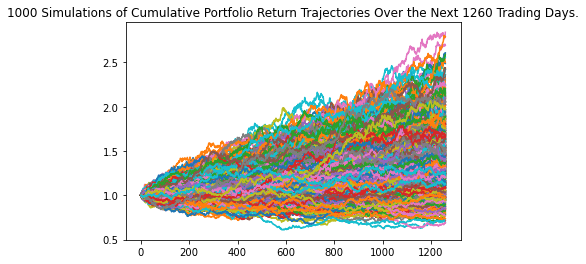

In [27]:
# Plot simulation outcomes
line_plot_2 = retirement_data_2.plot_simulation()

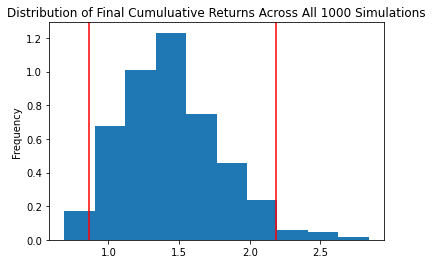

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_2 = retirement_data_2.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = retirement_data_2.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           1000.000000
mean               1.441580
std                0.350155
min                0.688123
25%                1.192168
50%                1.402805
75%                1.651000
max                2.841100
95% CI Lower       0.863167
95% CI Upper       2.185768
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl2[8]*initial_investment,2)
ci_upper_five = round(tbl2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $300000 in the portfolio over the next 5 years will end within in the range of $258950.01 and $655730.36


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
retirement_data_3 = MCSimulation(portfolio_data = df_ticker_2, weights = [0.5,0.5], num_simulation = 1000, num_trading_days = 252*10)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
retirement_data_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991824,1.010254,0.995817,1.003829,1.008908,1.004564,1.000180,0.995501,0.995251,1.006723,...,1.002806,1.007290,1.002401,0.998149,1.000402,1.001606,1.018830,1.001290,0.987514,1.024164
2,0.996359,1.009918,0.998598,1.010829,0.993750,0.999725,1.004734,0.989875,0.995669,1.013581,...,1.003236,1.009452,0.998110,1.006204,1.007672,1.006370,1.017315,0.990596,0.977088,1.028295
3,1.000883,1.001470,1.003367,1.003185,0.993669,0.993414,1.005186,0.999332,0.999733,1.024629,...,0.988318,1.006122,0.997944,1.009675,1.008875,1.003054,1.010584,0.981502,0.987479,1.031655
4,0.997138,1.002738,0.993039,1.000564,1.001059,0.991670,1.008495,1.004560,1.001562,1.027423,...,0.986065,1.010591,1.010797,1.007352,1.006988,1.000343,1.007080,0.982150,0.986807,1.021173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.879253,2.529497,1.940460,2.740618,3.827837,2.079196,2.040607,2.416920,2.673971,1.765177,...,3.431804,2.399979,2.207188,1.834425,1.141060,2.216355,1.989992,2.782140,2.123135,3.469951
2517,1.876324,2.540830,1.958740,2.724356,3.800149,2.100193,2.038282,2.400536,2.671173,1.755284,...,3.381538,2.414308,2.199433,1.828518,1.131442,2.227045,1.989178,2.809958,2.134079,3.452173
2518,1.883375,2.514848,1.947580,2.709451,3.804485,2.091731,2.044320,2.405162,2.678818,1.739752,...,3.352446,2.425412,2.214309,1.826856,1.137213,2.204147,1.988333,2.811867,2.148859,3.457930
2519,1.890323,2.498364,1.939843,2.720061,3.822453,2.088063,2.035461,2.404110,2.666565,1.736551,...,3.324157,2.424645,2.218446,1.852557,1.137931,2.214123,1.982501,2.827906,2.161933,3.464842


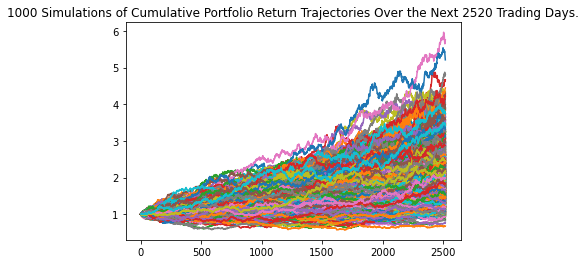

In [39]:
# Plot simulation outcomes
line_plot_3 = retirement_data_3.plot_simulation()

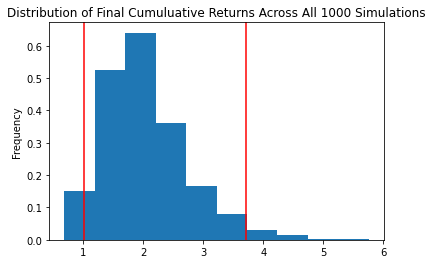

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_3 = retirement_data_3.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = retirement_data_3.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           1000.000000
mean               2.038101
std                0.692527
min                0.681014
25%                1.546561
50%                1.938626
75%                2.404815
max                5.756507
95% CI Lower       1.017037
95% CI Upper       3.714881
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl3[8]*initial_investment,2)
ci_upper_ten = round(tbl3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $300000 in the portfolio over the next 10 years will end within in the range of $305111.25 and $1114464.33
